# SCL Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the SCL product created by BOKU. This product contains the scene classification (SCL) layer, output of the ESA Sen2Cor algorithm. The product is resampled to the Equi7 Grid, covers an area of 100 km x 100 km with a pixel sampling of 10 m.

The product name in the ACube is `SCL_Sentinel_2`. It is composed of single measurement `band_1`.

Relevant links:
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/3.4.2.3.%20Products/
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
import xarray
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_scl', env='acube')
product = 'SCL_Sentinel_2'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,format,product_type,instrument,platform,crs,resolution,spatial_dimensions
id,,,,,,,,,
27,SCL_Sentinel_2,Scene Classification Layer,GeoTIFF,BOKU_SCL_S2,MSI,Sentinel-2,"PROJCS[""unnamed"",GEOGCS[""WGS 84"",DATUM[""WGS_19...","(-10, 10)","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

,,name,dtype,units,nodata,aliases
product,measurement,,,,,
SCL_Sentinel_2,band_1,band_1,uint8,DN,0,"[band_01, Band1, Band_1]"


In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2018-05-06', '2018-05-06')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['equi7_system', 'equi7_tile', 'extent', 'format', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'platform', 'product_type']
****************************************************************************************************
METADATA
{'equi7_system': 'EU010M',
 'equi7_tile': 'E052N016T1',
 'extent': {'center_dt': '2018-05-06T00:00:00',
            'coord': {'ll': {'lat': 47.97836637131796,
                             'lon': 15.455732336236064},
                      'lr': {'lat': 48.0747977797218, 'lon': 16.78723851350588},
                      'ul': {'lat': 48.87019287824474,
                             'lon': 15.300385421628878},
                      'ur': {'lat': 48.96874953569572,
                             'lon': 16.65563642003795}},
            'from_dt': '2018-05-06T00:00:00',
            'to_dt': '2018-05-06T00:00:00'},
 'format': {'nam

## Querying and displaying the data

The data in SCL represent 12 classes. Below we define a color map according to [ESA Classification Mask Generation](https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm) and use that for plotting.

![S2 sen2cor classes](../../Supplementary_data/classes.png)

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:      (time: 1, x: 1526, y: 2250)
Coordinates:
  * time         (time) datetime64[ns] 2018-05-06
  * y            (y) float64 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x            (x) float64 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 32633
Data variables:
    band_1       (time, y, x) uint8 4 4 4 4 4 4 4 4 4 4 ... 5 7 7 2 2 2 2 7 7 7
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

In [7]:
from matplotlib.colors import LinearSegmentedColormap

def rgb_scale(R, G, B):
    return (R/255, G/255, B/255)

colors = [
    rgb_scale(0, 0, 0),       # 0 - NO_DATA
    rgb_scale(255, 0, 0),     # 1 - SATURATED_OR_DEFECTIVE
    rgb_scale(46, 46, 46),    # 2 - DARK_AREA_PIXELS
    rgb_scale(84, 24, 0),     # 3 - CLOUD_SHADOWS
    rgb_scale(70, 232, 0),    # 4 - VEGETATION
    rgb_scale(255, 255, 0),   # 5 - NOT_VEGETATED
    rgb_scale(0, 0, 255),     # 6 - WATER
    rgb_scale(82, 82, 82),    # 7 - UNCLASSIFIED
    rgb_scale(120, 120, 120), # 8 - CLOUD_MEDIUM_PROBABILITY
    rgb_scale(181, 181, 181), # 9 - CLOUD_HIGH_PROBABILITY
    rgb_scale(0, 182, 191),   # 10 - THIN_CIRRUS
    rgb_scale(218, 0, 242),   # 11 - SNOW
]

cm = LinearSegmentedColormap.from_list('sen2cor_class', colors, N=len(colors))

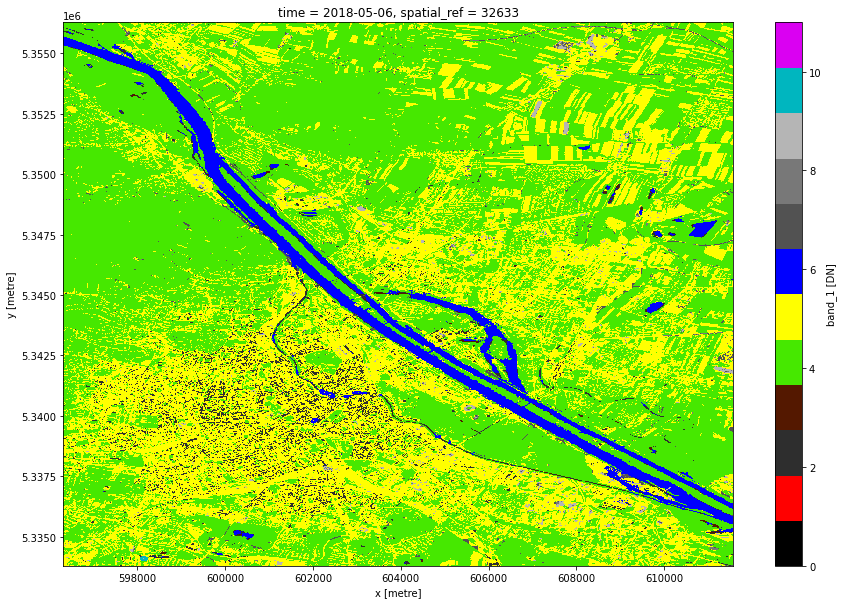

In [8]:
data.band_1.plot(size=10, vmax=11, cmap=cm)